PARTE 1 - BAIXAR E TREINAR OS DADOS

In [2]:
# Importar a base de dados
import pandas as pd 

df = pd.read_csv('dados/ENEM/microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='latin1')

*FILTROS*

In [36]:
# FILTRA PARA TER DADOS PRECISOS
# TIRA OS TREINEIROS
# TIRA QUEM NÃO FEZ AS DUAS PROVAS (ELIMINADO OU FALTOU) - NÚMEROS 0 E 2 
# TIRA QUE NÃO TEM A REDAÇÃO CORRIGIDA

# TIRA TREINEIRO (1 - Treineiro, 0 - Não Treineiro)
filtra_treineiros = df["IN_TREINEIRO"] == 0

# PEGAR PRESENÇA - PRECISA SER 1
# CIÊNCIA DAS NATUREZAS
filtra_CN = df["TP_PRESENCA_CN"] == 1
# CIÊNCIA HUMANAS
filtra_CH = df["TP_PRESENCA_CH"] == 1
# LINGUAGENS E CÓDIGOS
filtra_ling = df["TP_PRESENCA_LC"] == 1
# MATEMÁTICA
filtra_mat = df["TP_PRESENCA_MT"] == 1

# REDAÇÕES NÃO CORRIGIDAS (MELHOR TIRAR O STATUS IGUAL A 2 - ANULADA)
filtra_red = df["TP_STATUS_REDACAO"] != 2

df = df[filtra_treineiros & filtra_CN & filtra_CH & filtra_ling & filtra_mat & filtra_red]



*PEGA AS NOTAS POR MATÉRIA E GRUPO DE RENDA*

In [43]:

df_focado = pd.DataFrame()

# PEGA RENDA FAMILIAR
df_focado["RENDA"] = df["Q006"]

# PEGAR NOTAS

# Nota de redação
df_focado["NOTA REDAÇÃO"] = df["NU_NOTA_REDACAO"]
# Nota de Ciências da Natureza
df_focado["NOTA CIENCIA DA NATUREZA"] = df["NU_NOTA_CN"]
# Nota de Ciências Humanas
df_focado["NOTA CIENCIAS HUMANAS"] = df["NU_NOTA_CH"]
# Nota de Linguagens e Códigos
df_focado["NOTA LINGUAGEM E CODIGOS"] = df["NU_NOTA_LC"]
# Nota de Matemática
df_focado["NOTA MATEMATICA"] = df["NU_NOTA_MT"]

media_total_redacao = df_focado["NOTA REDAÇÃO"].mean()
media_total_cn = df_focado["NOTA CIENCIA DA NATUREZA"].mean()
media_total_ch = df_focado["NOTA CIENCIAS HUMANAS"].mean()
media_total_lc = df_focado["NOTA LINGUAGEM E CODIGOS"].mean()
media_total_m = df_focado["NOTA MATEMATICA"].mean()

std_total_redacao = df_focado["NOTA REDAÇÃO"].std()
std_total_cn = df_focado["NOTA CIENCIA DA NATUREZA"].std()
std_total_ch = df_focado["NOTA CIENCIAS HUMANAS"].std()
std_total_lc = df_focado["NOTA LINGUAGEM E CODIGOS"].std()
std_total_m = df_focado["NOTA MATEMATICA"].std()


*FAZ A MÉDIA DAS NOTAS POR GRUPO DE RENDAS*


In [35]:
df_rendas_notas = pd.DataFrame()
renda_categorias = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]

medias_por_categoria = {
    "RENDA": [],
    "MEDIA REDAÇÃO": [],
    "MEDIA CIENCIA DA NATUREZA": [],
    "MEDIA CIENCIAS HUMANAS": [],
    "MEDIA LINGUAGEM E CODIGOS": [],
    "MEDIA MATEMATICA": []}

for categoria_social in renda_categorias:

    df_renda = df_focado.loc[df_focado['RENDA'] == categoria_social]

    media_renda_a_redacao = df_renda["NOTA REDAÇÃO"].mean()
    media_renda_a_cnatureza = df_renda["NOTA CIENCIA DA NATUREZA"].mean()
    media_renda_a_chumanas = df_renda["NOTA CIENCIAS HUMANAS"].mean()
    media_renda_a_clinguagem = df_renda["NOTA LINGUAGEM E CODIGOS"].mean()
    media_renda_a_cmatematica = df_renda["NOTA MATEMATICA"].mean()

    medias_por_categoria["RENDA"].append(categoria_social)
    medias_por_categoria["MEDIA REDAÇÃO"].append(media_renda_a_redacao)
    medias_por_categoria["MEDIA CIENCIA DA NATUREZA"].append(media_renda_a_cnatureza)
    medias_por_categoria["MEDIA CIENCIAS HUMANAS"].append(media_renda_a_chumanas)
    medias_por_categoria["MEDIA LINGUAGEM E CODIGOS"].append(media_renda_a_clinguagem)
    medias_por_categoria["MEDIA MATEMATICA"].append(media_renda_a_cmatematica)

df_rendas_notas = pd.DataFrame(medias_por_categoria)

df_rendas_notas

,RENDA,MEDIA REDAÇÃO,MEDIA CIENCIA DA NATUREZA,MEDIA CIENCIAS HUMANAS,MEDIA LINGUAGEM E CODIGOS,MEDIA MATEMATICA
0,A,528.873306,460.945067,484.127891,469.256624,472.800189
1,B,567.449786,470.142452,498.754261,488.294308,492.413153
2,C,603.612709,484.845147,519.841491,512.146039,521.996753
3,D,624.452211,494.046876,530.719155,523.280379,538.869248
4,E,647.083653,503.782488,541.080505,532.915854,556.296029
5,F,667.026945,513.445254,550.871190,541.164862,574.043412
6,G,682.822103,520.666301,558.204396,547.694902,584.987572
7,H,706.454888,531.294244,568.466925,555.787612,602.166304
8,I,725.599408,541.671006,577.799811,563.175627,618.437926
9,J,737.603457,547.149314,583.355377,567.678976,627.754118


*GRAFICO DA MÉDIA DAS NOTAS POR RENDA FAMILIAR*

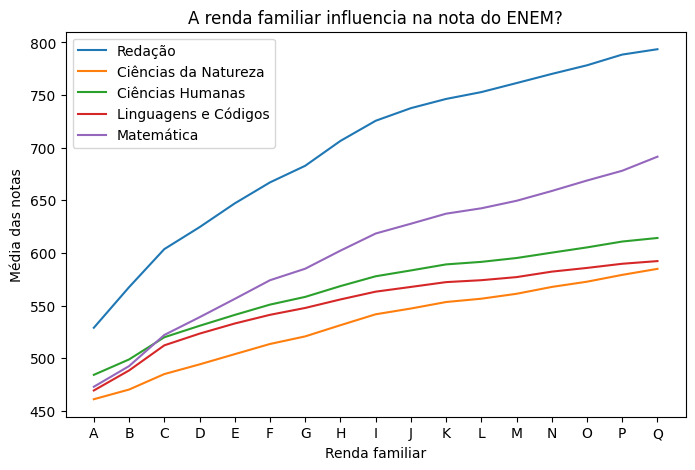

In [37]:
# Gerar grafico df_rendas_notas
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.title("A renda familiar influencia na nota do ENEM?")
plt.xlabel("Renda familiar")
plt.ylabel("Média das notas")
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA REDAÇÃO"], label="Redação")
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA CIENCIA DA NATUREZA"], label="Ciências da Natureza")
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA CIENCIAS HUMANAS"], label="Ciências Humanas")
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA LINGUAGEM E CODIGOS"], label="Linguagens e Códigos")  
plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA MATEMATICA"], label="Matemática")
plt.legend()
plt.show()

In [44]:
df_rendas_notas = pd.DataFrame()
renda_categorias = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]

medias_por_categoria = {
    "RENDA": [],
    "MEDIA REDAÇÃO": [],
    "MEDIA CIENCIA DA NATUREZA": [],
    "MEDIA CIENCIAS HUMANAS": [],
    "MEDIA LINGUAGEM E CODIGOS": [],
    "MEDIA MATEMATICA": []}

for categoria_social in renda_categorias:

    df_renda = df_focado.loc[df_focado['RENDA'] == categoria_social]

    media_renda_a_redacao = (df_renda["NOTA REDAÇÃO"].mean() - media_total_redacao) / std_total_redacao
    media_renda_a_cnatureza = (df_renda["NOTA CIENCIA DA NATUREZA"].mean() - media_total_cn) / std_total_cn
    media_renda_a_chumanas = (df_renda["NOTA CIENCIAS HUMANAS"].mean() - media_total_ch) / std_total_ch
    media_renda_a_clinguagem = (df_renda["NOTA LINGUAGEM E CODIGOS"].mean() - media_total_lc) / std_total_lc
    media_renda_a_cmatematica = (df_renda["NOTA MATEMATICA"].mean() - media_total_m) / std_total_m

    medias_por_categoria["RENDA"].append(categoria_social)
    medias_por_categoria["MEDIA REDAÇÃO"].append(media_renda_a_redacao)
    medias_por_categoria["MEDIA CIENCIA DA NATUREZA"].append(media_renda_a_cnatureza)
    medias_por_categoria["MEDIA CIENCIAS HUMANAS"].append(media_renda_a_chumanas)
    medias_por_categoria["MEDIA LINGUAGEM E CODIGOS"].append(media_renda_a_clinguagem)
    medias_por_categoria["MEDIA MATEMATICA"].append(media_renda_a_cmatematica)

df_rendas_notas = pd.DataFrame(medias_por_categoria)

df_rendas_notas

,RENDA,MEDIA REDAÇÃO,MEDIA CIENCIA DA NATUREZA,MEDIA CIENCIAS HUMANAS,MEDIA LINGUAGEM E CODIGOS,MEDIA MATEMATICA
0,A,-0.487370,-0.498269,-0.575534,-0.659876,-0.590684
1,B,-0.297575,-0.372742,-0.394621,-0.412272,-0.423631
2,C,-0.119655,-0.172077,-0.133793,-0.102056,-0.171654
3,D,-0.017126,-0.046490,0.000752,0.042757,-0.027943
4,E,0.094220,0.086383,0.128912,0.168076,0.120489
5,F,0.192340,0.218262,0.250012,0.275363,0.271651
6,G,0.270051,0.316816,0.340717,0.360292,0.364868
7,H,0.386323,0.461868,0.467654,0.465546,0.511187
8,I,0.480513,0.603492,0.583092,0.561635,0.649779
9,J,0.539573,0.678261,0.651808,0.620205,0.729130


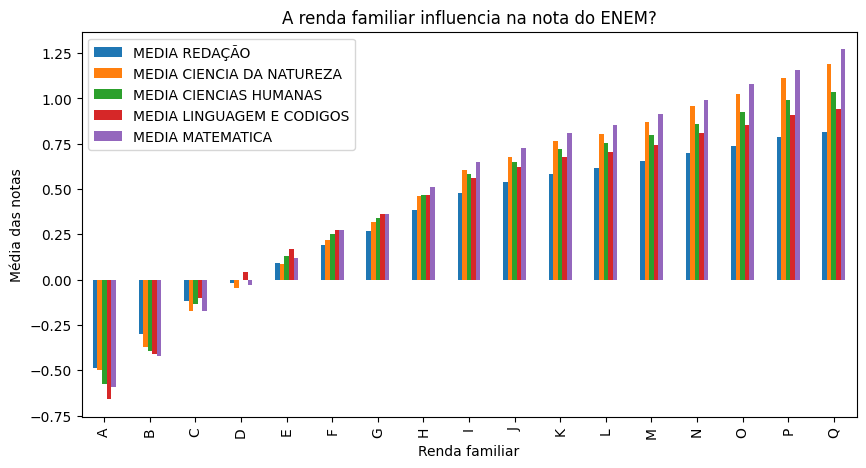

In [47]:
# Gerar grafico df_rendas_notas
import matplotlib.pyplot as plt

# plt.figure(figsize=(8,5))
# plt.title("A renda familiar influencia na nota do ENEM?")
# plt.xlabel("Renda familiar")
# plt.ylabel("Média das notas")
# plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA REDAÇÃO"], label="Redação")
# plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA CIENCIA DA NATUREZA"], label="Ciências da Natureza")
# plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA CIENCIAS HUMANAS"], label="Ciências Humanas")
# plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA LINGUAGEM E CODIGOS"], label="Linguagens e Códigos")  
# plt.plot(df_rendas_notas["RENDA"], df_rendas_notas["MEDIA MATEMATICA"], label="Matemática")
# plt.legend()
# plt.show()

plt.style.use('default')
df_rendas_notas.plot.bar(x="RENDA", y=["MEDIA REDAÇÃO", "MEDIA CIENCIA DA NATUREZA", "MEDIA CIENCIAS HUMANAS", "MEDIA LINGUAGEM E CODIGOS", "MEDIA MATEMATICA"], figsize=(10,5))
plt.title("A renda familiar influencia na nota do ENEM?")
plt.xlabel("Renda familiar")
plt.ylabel("Média das notas")
plt.show()
